# Activation Function
Activation function plays a significant part in deep learning, it introduces nonlinearity to neural network which enable deep neural network learn nonlinear information from data. Some researches show that human brain distinguish between useful information and useless information at the first time. Therefore, in the neural network, we also need a similar mechanism. 

There are two key characters that activation functiuon should have:

a. non-linearity

b. differentiable(in order to backprop)




Firstly, let me introduce some popular activation functions which are broadly implemented in current researches.

### 1. Sigmoid 

$$f(x) = \frac{1}{1+e^{-x}}$$

Sigmoid function was one of the most popular activation function couple years ago, it could map constant value into the range(0,1). Particularly, if it's a very large negative value, then output 0; If it's very large positive value, then output 1.



In [45]:
import matplotlib.pyplot as plt
import numpy as np
import math

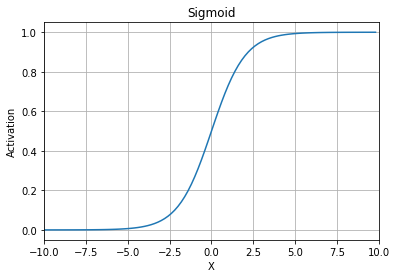

In [46]:
# plot sigmoid function, source:
# http://squall0032.tumblr.com/post/77300791096/plotting-a-sigmoid-function-using

def sigmoid(x):
    l = []
    for i in x:
        l.append(1/(1+math.exp(-i)))
    return l


x = np.arange(-10., 10., 0.2)
sig = sigmoid(x)


plt.xlabel('X')
plt.ylabel('Activation')
plt.title('Sigmoid')
plt.plot(x,sig)
plt.axis([-10, 10, -.05, 1.05])
plt.grid(True)
plt.savefig('sigmoid.jpg')
plt.show()


However, there are two major problems of sigmoid function making it fall out of popularity recently.

1. Sigmoids might kill gradients. 
    
    From the figure above, we can see when our input is very large or small(saturation), the gradients will be so close to 0 which make our neural network difficult to learn.


2. Non-zero-centered.
    
    This problem make the output all positive or all negative which makes gradients updates too far in different directions.

### 2. Tanh(Hyperbolic Tangent Function)
$$f(x) = \frac{2}{1+e^{-2x}}-1 = \frac{e^x-e^{-x}}{e^x+e^{-x}}-1 = 2sigmoid(2x)-1$$

Tanh squashes real number into a range between -1 and 1 instead of 0 and 1

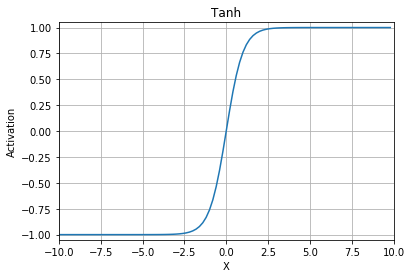

In [47]:
def tanh(x):
    l = []
    for i in x:
        l.append(2/(1+math.exp(-2*i))-1)
    return l


x = np.arange(-10., 10., 0.2)
tan = tanh(x)


plt.xlabel('X')
plt.ylabel('Activation')
plt.title('Tanh')
plt.plot(x,tan)
plt.axis([-10, 10, -1.05, 1.05])
plt.grid(True)
plt.savefig('tanh.jpg')
plt.show()

### 3. Relu(Rectified Linear Unit)
$$f(x) = max(0,x)$$

Relu activation function is usually used in hidden layers. Comparing to sigmoid and tanh, it has several improvements.

* When input is postive, no gradient saturation.
* Krizhevsky et al. found out Relu converge faster than sigmoid and tanh.

Still, Relu has several disadvantages.

* One problem is some unit could be fragile during the training. When input is negative, Relu is completely un-activated. In other words, if input goes to negative, this neuron will be dead forever.
* The other problem is Relu is also non-0-centered.

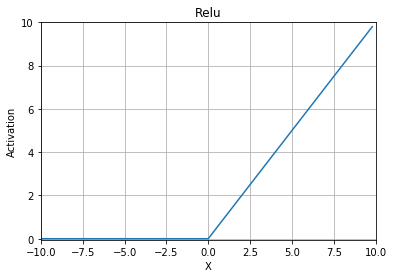

In [48]:
def Relu(x):
    l = []
    for i in x:
        l.append(max(0,i))
    return l


x = np.arange(-10., 10., 0.2)
rl = Relu(x)


plt.xlabel('X')
plt.ylabel('Activation')
plt.title('Relu')
plt.plot(x,rl)
plt.axis([-10, 10, -0.05, 10])
plt.grid(True)
plt.savefig('relu.jpg')
plt.show()

### 4. Leaky Relu
$$\begin{array}{lr}
             f(x)=\alpha x, &x \leq 0  \\
             f(x) = x, & x \geq 0\\ 
             \end{array}$$

Here comes Leaky Relu which introduce a small slope when input is negative and keep the update alive. 

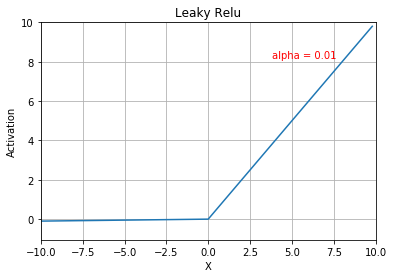

In [49]:
def Leaky_Relu(x,alpha):
    l = []
    for i in x:
        if i <= 0:
            l.append(alpha*i)
        else:
            l.append(i)
    return l


x = np.arange(-10., 10., 0.2)
lrl = Leaky_Relu(x,0.01)


plt.xlabel('X')
plt.ylabel('Activation')
plt.title('Leaky Relu')
plt.text(3.8,8.2,'alpha = 0.01',color='red')
plt.plot(x,lrl)
plt.axis([-10, 10, -1.05, 10])
plt.grid(True)
plt.savefig('leaky_relu.jpg')
plt.show()

### 5. Parametric ReLU
We know α in Leaky ReLU is usually given manually with experience. We also know we can calculate the derivative of the loss function to the α. So, can we train this α as a parameter during training process?

Delving Deep into Rectifiers: Surpassing Human-Level Performance on ImageNet Classification describe how to implement parametric ReLU.

### 6. Randomized Leaky ReLU
Randomized Leaky Rectified Linear is the randomized
version of leaky ReLU. It is first proposed and used in
Kaggle NDSB Competition. The highlight of RReLU
is that in training process, $a_{ji}$ is a random number
sampled from a uniform distribution U(l, u). Formally,
we have:

\begin{equation} y_{ji}=  
\left\{ 
             \begin{array}{**lr**}  
             x_{ji}, & if x_{ji} ≥ 0 \\  
             a_{ji}x_{ji}, & if x_{ji} < 0\\    
             \end{array}  
\right.  
\end{equation}  
where
$a_{ji} ∼ U(l, u)$, $l < u$ and $l, u ∈ [0, 1) $

In the test phase, we take average of all the $a_{ji}$ in
training as in the method of dropout (Srivastava et al.,
2014) , and thus set $a_{ji}$ to $l+u$
2
to get a deterministic
result. Suggested by the NDSB competition winner,
aji is sampled from U(3, 8). We use the same configuration
in this paper.
In test time, we use:
yji =
xji
l+u